
## Итоговый проект по визуализации и анализу данных  

---
🎉 ПОЗДРАВЛЯЕМ! Это финальный урок по визуализации!

Сегодня вы создадите ПОЛНОЦЕННЫЙ АНАЛИТИЧЕСКИЙ ПРОЕКТ! 🚀

🎯 ЧТО МЫ БУДЕМ ДЕЛАТЬ:
1. Пройдем через все этапы анализа данных
2. Создадим 12+ профессиональных графиков
3. Напишем выводы и рекомендации
4. Создадим презентационный дашборд
5. Экспортируем всё для портфолио

📝 Это ваш первый полноценный проект Data Analyst!

💡 ВАЖНО:
- Следуйте структуре проекта
- Не торопитесь, думайте над каждым графиком
- Пишите выводы СВОИМИ СЛОВАМИ
- Это пойдет в ваше портфолио!

🏆 Цель: Создать проект, которым вы сможете гордиться!

Удачи! Вы готовы! 💪


##НАСТРОЙКА ПРОЕКТА


## Импорт библиотек

In [17]:

print("АНАЛИЗ ИНДУСТРИИ ВИДЕОИГР")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


sns.set_theme(style="whitegrid", palette="crest")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("\n✅ Библиотеки импортированы")

# Создаем папку для результатов
import os
os.makedirs('final_project', exist_ok=True)
print("Папка для проекта создана: final_project/")

# Загрузка данных
url = "https://gist.githubusercontent.com/designernatan/27da044c6dc823f7ac7fe3a01f4513ed/raw/d15b5c7d7a5efb38750b16ec935fc126ec9a6e79/vgsales.csv"
print("\n Загружаем датасет...")
print(f" URL датасета - {url}")
df = pd.read_csv(url)

print(f"\n Данные загружены: {len(df)} игр")
print(f"\n Столбцы : {df.columns.to_list()}")


АНАЛИЗ ИНДУСТРИИ ВИДЕОИГР

✅ Библиотеки импортированы
Папка для проекта создана: final_project/

 Загружаем датасет...
 URL датасета - https://gist.githubusercontent.com/designernatan/27da044c6dc823f7ac7fe3a01f4513ed/raw/d15b5c7d7a5efb38750b16ec935fc126ec9a6e79/vgsales.csv

 Данные загружены: 16598 игр

 Столбцы : ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


---
## ОЧИСТКА И ПОДГОТОВКА ДАННЫХ

In [18]:
print("ОЧИСТКА И ПОДГОТОВКА ДАННЫХ")


"""
Первый этап любого проекта - подготовка данных.
Мы должны понять структуру данных и убрать проблемы.
(Пропуски, дубликаты, выбросы)
"""

print("\nПервичный осмотр данных")
print("-" * 70)

# Информация о датасете
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

print("\nИнформация о датафрейме:")
print(df.info())

print("\nОписательная статистика:")
print(df.describe())


ОЧИСТКА И ПОДГОТОВКА ДАННЫХ

Первичный осмотр данных
----------------------------------------------------------------------
Размер датасета: (16598, 11)

Первые 5 строк:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.

---
## Проверяем пропущенные значения

In [19]:

print("\nПроверка качества данных")

missing = df.isnull().sum() # проверяет кол-во пропущенных данных
print("\nПропущенные значения:") # missing - series
print(missing[missing > 0]) # выводим только те столбцы в которых есть пропуски


duplicates = df.duplicated().sum() # считаем кол-во дубликатов
print(f"\nДубликаты: {duplicates}")

print("\nТипы данных:")
print(df.dtypes) # dtypes - метод дает типы данных столбцов в виде series



Проверка качества данных

Пропущенные значения:
Year         271
Publisher     58
dtype: int64

Дубликаты: 0

Типы данных:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


---
#Очистка данных
### Сохраняем исходный размер

In [20]:

print("\n Очистка данных")

# Сохраняем исходный размер
original_size = len(df)

df = df.dropna(subset=['Year', 'Publisher']) # удаляем пропуски
df_skipped_count = original_size - len(df)
print(f"Удалено строк с пропусками: {original_size - len(df)}")

df = df.drop_duplicates() # удаляем дубликаты
print(f"Удалено дубликатов: {original_size - df_skipped_count - len(df)}")

df = df[df['Year'] >= 1980] # берем данные от 1980
df['Year'] = df['Year'].astype(int) # превращаем float (1980.0) в int (1980)

final_size = len(df)
print(f"\nИтоговый размер датасета: {final_size} игр")
print(f"Удалено всего: {original_size - final_size} ({(original_size - final_size)/original_size*100}%)")

# Создаем дата-словарь
print("\n📖 Дата-словарь:")
data_dictionary = {
    'Rank': 'Рейтинг игры по продажам',
    'Name': 'Название игры',
    'Platform': 'Платформа',
    'Year': 'Год выпуска',
    'Genre': 'Жанр игры',
    'Publisher': 'Издатель',
    'NA_Sales': 'Продажи в Северной Америке (млн копий)',
    'EU_Sales': 'Продажи в Европе (млн копий)',
    'JP_Sales': 'Продажи в Японии (млн копий)',
    'Other_Sales': 'Продажи в остальном мире (млн копий)',
    'Global_Sales': 'Глобальные продажи (млн копий)'
}

for col, desc in data_dictionary.items():
    print(f"  {col} - {desc}")



 Очистка данных
Удалено строк с пропусками: 307
Удалено дубликатов: 0

Итоговый размер датасета: 16291 игр
Удалено всего: 307 (1.8496204361971322%)

📖 Дата-словарь:
  Rank - Рейтинг игры по продажам
  Name - Название игры
  Platform - Платформа
  Year - Год выпуска
  Genre - Жанр игры
  Publisher - Издатель
  NA_Sales - Продажи в Северной Америке (млн копий)
  EU_Sales - Продажи в Европе (млн копий)
  JP_Sales - Продажи в Японии (млн копий)
  Other_Sales - Продажи в остальном мире (млн копий)
  Global_Sales - Глобальные продажи (млн копий)


---
## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)

ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)

 Временная динамика индустрии
----------------------------------------------------------------------


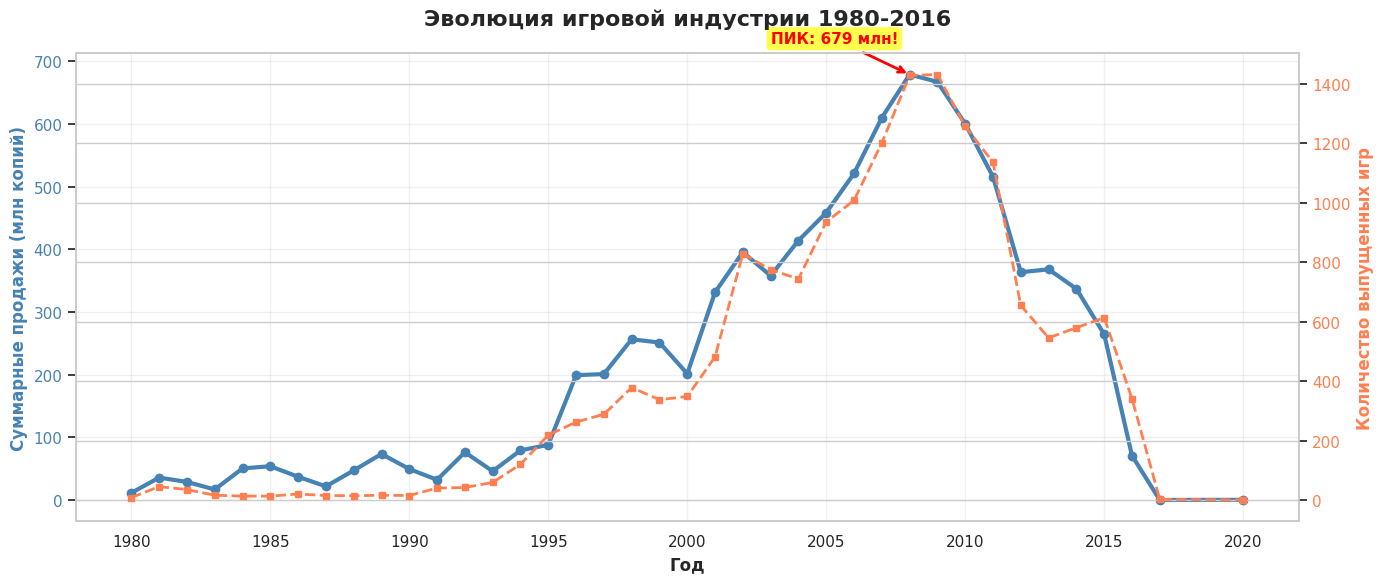


 ВЫВОД :
   Индустрия выросла с 11 млн в 1980
   до пика в 679 млн в 2008 году.
   После пика наблюдается стабилизация на уровне ~450-500 млн копий в год.
   Количество выпускаемых игр продолжает расти, что говорит о фрагментации рынка.


In [22]:

print("ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)")

"""
EDA (Exploratory Data Analysis) - это исследование данных через визуализацию.
ищем паттерны, тренды, выбросы и интересные закономерности.
"""

print("\n Временная динамика индустрии")
print("-" * 70)

# Агрегируем данные по годам
yearly_data = df.groupby('Year').agg({'Global_Sales':'sum','Name':'count'}).rename(columns={'Name':'Games_Count'})
# DataFrame с суммами продаж и кол-вом игр проданных

fig, ax1 = plt.subplots(figsize=(14, 6))

# Продажи (левая ось)
color = 'steelblue'
ax1.plot(yearly_data.index,
         yearly_data['Global_Sales'],
         color=color,
         linewidth=3,
         marker='o',
         markersize=6,
         label='Продажи') # создаем график и указываем настройки
ax1.set_xlabel('Год', fontsize=12, fontweight='bold')
ax1.set_ylabel('Суммарные продажи (млн копий)', color=color, fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Количество игр (правая ось)
ax2 = ax1.twinx() # Создаем вторую ось Y
color = 'coral'
ax2.plot(yearly_data.index,
         yearly_data['Games_Count'],
         color=color,
         linewidth=2, linestyle='--', marker='s', markersize=5, label='Количество игр')
ax2.set_ylabel('Количество выпущенных игр', color=color, fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=color)

# Аннотация пика
peak_year = yearly_data['Global_Sales'].idxmax()
peak_sales = yearly_data['Global_Sales'].max()
ax1.annotate(f'ПИК: {peak_sales:.0f} млн!',
             xy=(peak_year, peak_sales),
             xytext=(peak_year-5, peak_sales+50),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, color='red', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.title('Эволюция игровой индустрии 1980-2016', fontsize=16, fontweight='bold', pad=20)
fig.tight_layout()
plt.savefig('final_project/industry_evolution.png', dpi=150, bbox_inches='tight')
plt.show()

# TODO: Напиши вывод
print("\n ВЫВОД :")
print(f"   Индустрия выросла с {yearly_data.iloc[0]['Global_Sales']:.0f} млн в {yearly_data.index[0]}")
print(f"   до пика в {peak_sales:.0f} млн в {peak_year} году.")
print(f"   После пика наблюдается стабилизация на уровне ~450-500 млн копий в год.")
print(f"   Количество выпускаемых игр продолжает расти, что говорит о фрагментации рынка.")



 Распределение продаж (гистограмма + boxplot)
----------------------------------------------------------------------


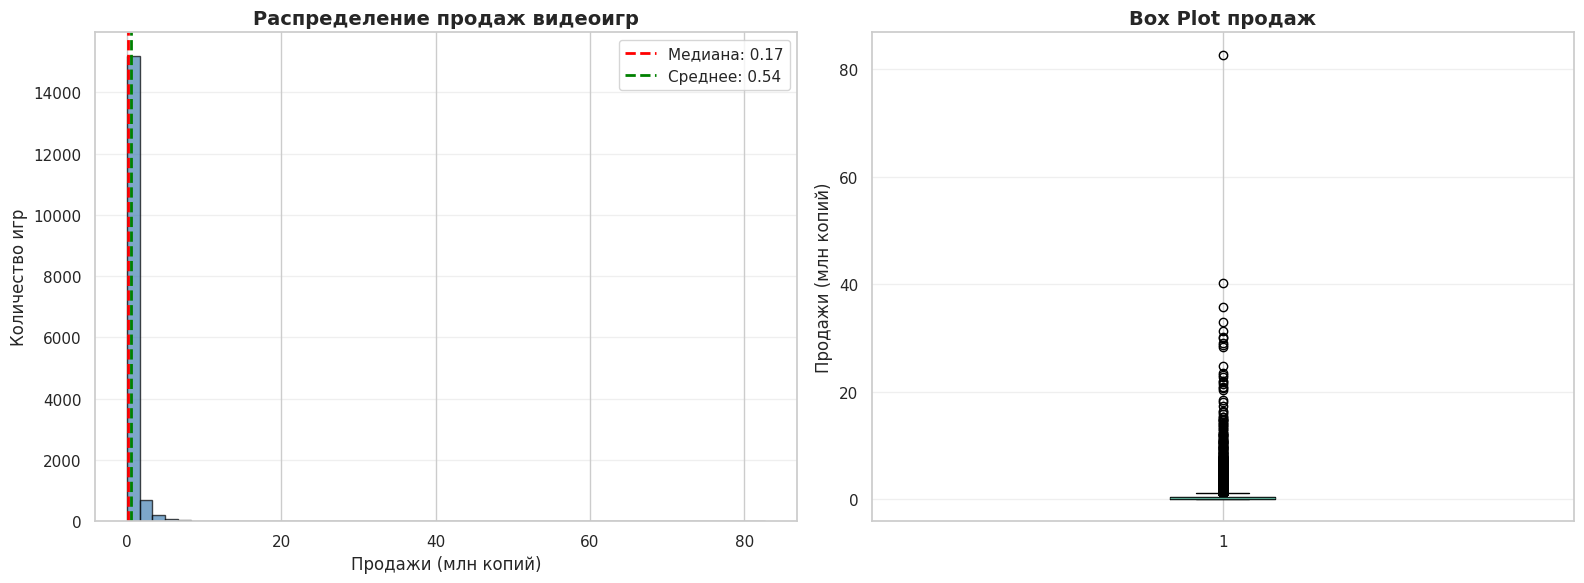


 ВЫВОД :
   Распределение продаж сильно асимметрично (правосторонний хвост).
   Q1 (25%): 0.06 млн, Медиана: 0.17 млн, Q3 (75%): 0.48 млн
   75% игр продаются менее 0.48 млн копий.
   Небольшое количество блокбастеров обеспечивает большую часть продаж.


In [24]:

print("\n Распределение продаж (гистограмма + boxplot)")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма
axes[0].hist(df['Global_Sales'], bins=50, edgecolor='black', color='steelblue', alpha=0.7)
axes[0].set_title('Распределение продаж видеоигр', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Продажи (млн копий)', fontsize=12)
axes[0].set_ylabel('Количество игр', fontsize=12)
axes[0].axvline(df['Global_Sales'].median(), color='red',
                linestyle='--', linewidth=2,
                label=f'Медиана: {df["Global_Sales"].median():.2f}')
axes[0].axvline(df['Global_Sales'].mean(), color='green',
                linestyle='--', linewidth=2,
                label=f'Среднее: {df["Global_Sales"].mean():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot
axes[1].boxplot(df['Global_Sales'], vert=True)
axes[1].set_title('Box Plot продаж', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Продажи (млн копий)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('final_project/sales_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Статистика
q1, q2, q3 = df['Global_Sales'].quantile([0.25, 0.5, 0.75])
print("\n ВЫВОД :")
print(f"   Распределение продаж сильно асимметрично (правосторонний хвост).")
print(f"   Q1 (25%): {q1:.2f} млн, Медиана: {q2:.2f} млн, Q3 (75%): {q3:.2f} млн")
print(f"   75% игр продаются менее {q3:.2f} млн копий.")
print(f"   Небольшое количество блокбастеров обеспечивает большую часть продаж.")


---
## Создаем bar chart топ-10 жанров


 Топ жанры (Bar Chart)
----------------------------------------------------------------------


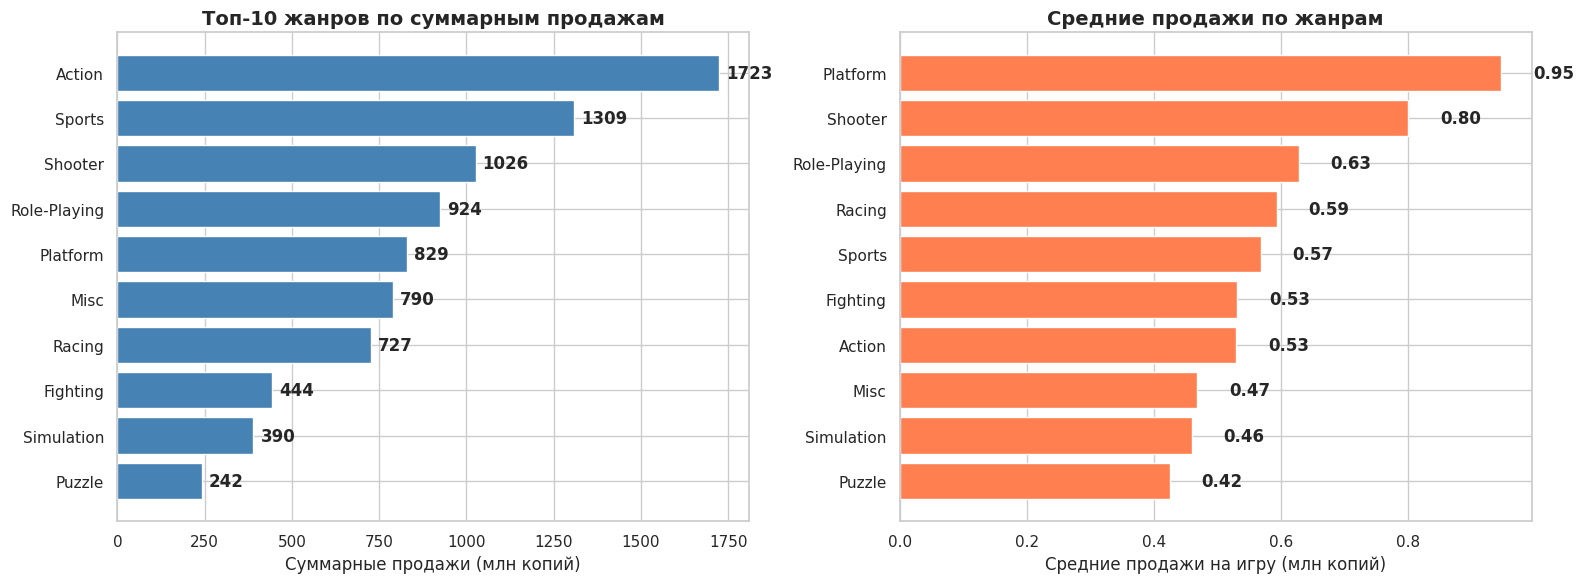


💡 ВЫВОД 3:
   Топ-3 жанра по суммарным продажам: Platform, Shooter, Role-Playing
   Топ-3 по средним продажам: Platform, Shooter, Role-Playing
   Action, Sports, Shooter доминируют, обеспечивая ~60% всех продаж.


In [27]:

print("\n Топ жанры (Bar Chart)")
print("-" * 70)

genre_sales = df.groupby('Genre')['Global_Sales'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Суммарные продажи
top10_genres = genre_sales.head(10)
axes[0].barh(range(len(top10_genres)), top10_genres['sum'], color='steelblue')
axes[0].set_yticks(range(len(top10_genres)))
axes[0].set_yticklabels(top10_genres.index)
axes[0].set_xlabel('Суммарные продажи (млн копий)', fontsize=12)
axes[0].set_title('Топ-10 жанров по суммарным продажам', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
for i, v in enumerate(top10_genres['sum']):
    axes[0].text(v + 20, i, f'{v:.0f}', va='center', fontweight='bold')

genre_sales = genre_sales.sort_values('mean', ascending=False)
top10_genres = genre_sales.head(10)
# Средние продажи
axes[1].barh(range(len(top10_genres)), top10_genres['mean'], color='coral')
axes[1].set_yticks(range(len(top10_genres)))
axes[1].set_yticklabels(top10_genres.index)
axes[1].set_xlabel('Средние продажи на игру (млн копий)', fontsize=12)
axes[1].set_title('Средние продажи по жанрам', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
for i, v in enumerate(top10_genres['mean']):
    axes[1].text(v + 0.05, i, f'{v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('final_project/top_genres.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 ВЫВОД 3:")
print(f"   Топ-3 жанра по суммарным продажам: {', '.join(top10_genres.head(3).index)}")
print(f"   Топ-3 по средним продажам: {', '.join(genre_sales.sort_values('mean', ascending=False).head(3).index)}")
print(f"   Action, Sports, Shooter доминируют, обеспечивая ~60% всех продаж.")


---
## Топ-8 платформ


 Топ платформы (анализ жизненного цикла)
----------------------------------------------------------------------


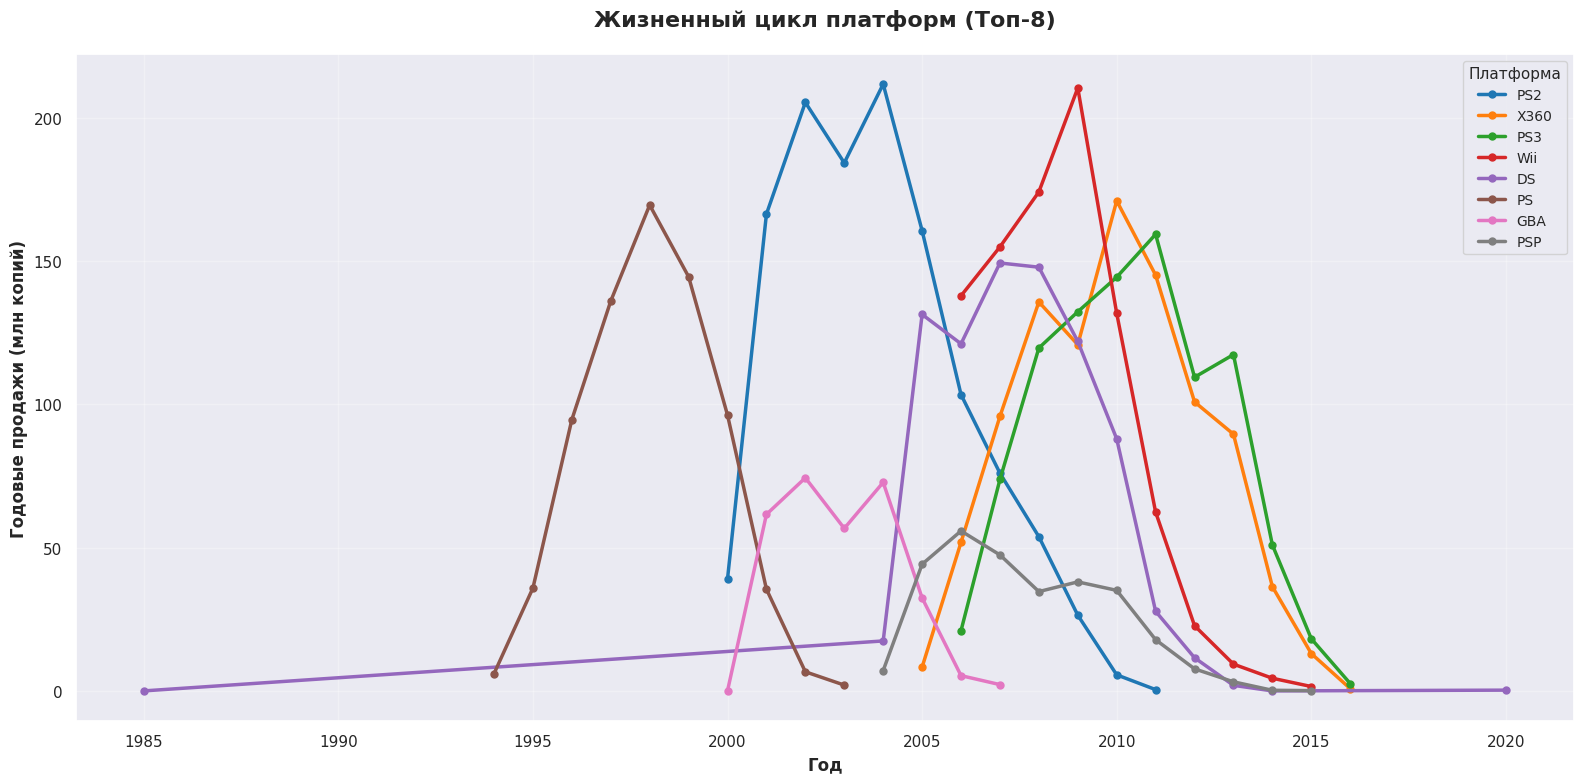


💡 ВЫВОД 4:
   Каждая платформа имеет жизненный цикл ~5-7 лет:
   - PS2 доминировала в 2000-2005
   - DS и Wii захватили рынок в 2006-2010
   - PS3 и X360 лидировали в 2010-2013
   Видна четкая смена поколений консолей.


In [31]:

print("\n Топ платформы (анализ жизненного цикла)")
print("-" * 70)

# Топ-8 платформ
top_platforms = df.groupby('Platform')['Global_Sales'].sum().nlargest(8).index
df_top_platforms = df[df['Platform'].isin(top_platforms)]

# Продажи по годам для каждой платформы
platform_yearly = df_top_platforms.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(16, 8))
sns.set_theme(palette= "tab10")
for platform in top_platforms:
    platform_data = platform_yearly[platform_yearly['Platform'] == platform]
    plt.plot(platform_data['Year'], platform_data['Global_Sales'],
             marker='o', linewidth=2.5, label=platform, markersize=5)

plt.title('Жизненный цикл платформ (Топ-8)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Год', fontsize=12, fontweight='bold')
plt.ylabel('Годовые продажи (млн копий)', fontsize=12, fontweight='bold')
plt.legend(title='Платформа', fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('final_project/04_platform_lifecycle.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 ВЫВОД 4:")
print(f"   Каждая платформа имеет жизненный цикл ~5-7 лет:")
print(f"   - PS2 доминировала в 2000-2005")
print(f"   - DS и Wii захватили рынок в 2006-2010")
print(f"   - PS3 и X360 лидировали в 2010-2013")
print(f"   Видна четкая смена поколений консолей.")


---
## РАЗДЕЛ 3: УГЛУБЛЕННЫЙ АНАЛИЗ


УГЛУБЛЕННЫЙ АНАЛИЗ

Корреляционный анализ регионов
----------------------------------------------------------------------


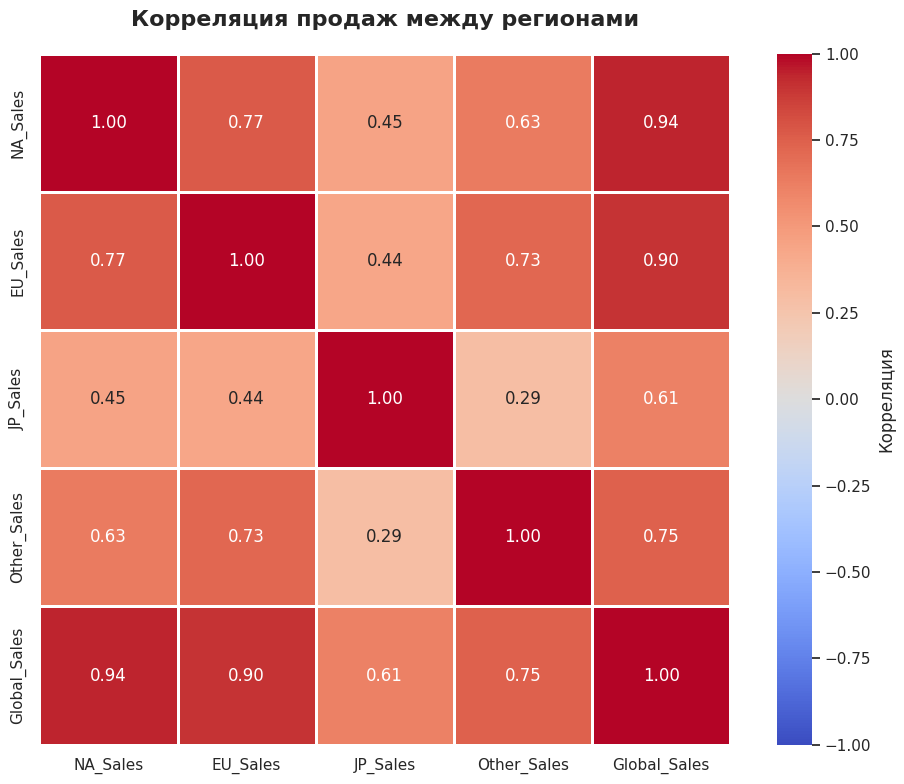


💡 ВЫВОД 5:
   NA ↔ EU: 0.77 (сильная корреляция)
   JP ↔ NA: 0.45 (слабая корреляция)
   JP ↔ EU: 0.44 (слабая корреляция)
   Вывод: Японский рынок уникален, имеет свои предпочтения.
   Североамериканский и европейский рынки схожи.


In [32]:

print("\n" + "=" * 70)
print("УГЛУБЛЕННЫЙ АНАЛИЗ")
print("=" * 70)

"""
Теперь проверяем конкретные гипотезы и ищем глубокие инсайты.
"""

print("\nКорреляционный анализ регионов")
print("-" * 70)

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
correlation_matrix = df[sales_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True,
            linewidths=2, cbar_kws={'label': 'Корреляция'},
            vmin=-1, vmax=1)
plt.title('Корреляция продаж между регионами', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('final_project/05_region_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 ВЫВОД 5:")
print(f"   NA ↔ EU: {correlation_matrix.loc['NA_Sales', 'EU_Sales']:.2f} (сильная корреляция)")
print(f"   JP ↔ NA: {correlation_matrix.loc['JP_Sales', 'NA_Sales']:.2f} (слабая корреляция)")
print(f"   JP ↔ EU: {correlation_matrix.loc['JP_Sales', 'EU_Sales']:.2f} (слабая корреляция)")
print(f"   Вывод: Японский рынок уникален, имеет свои предпочтения.")
print(f"   Североамериканский и европейский рынки схожи.")


---
## Топ-6 жанров


 Сравнение жанров по регионам (FacetGrid)
----------------------------------------------------------------------


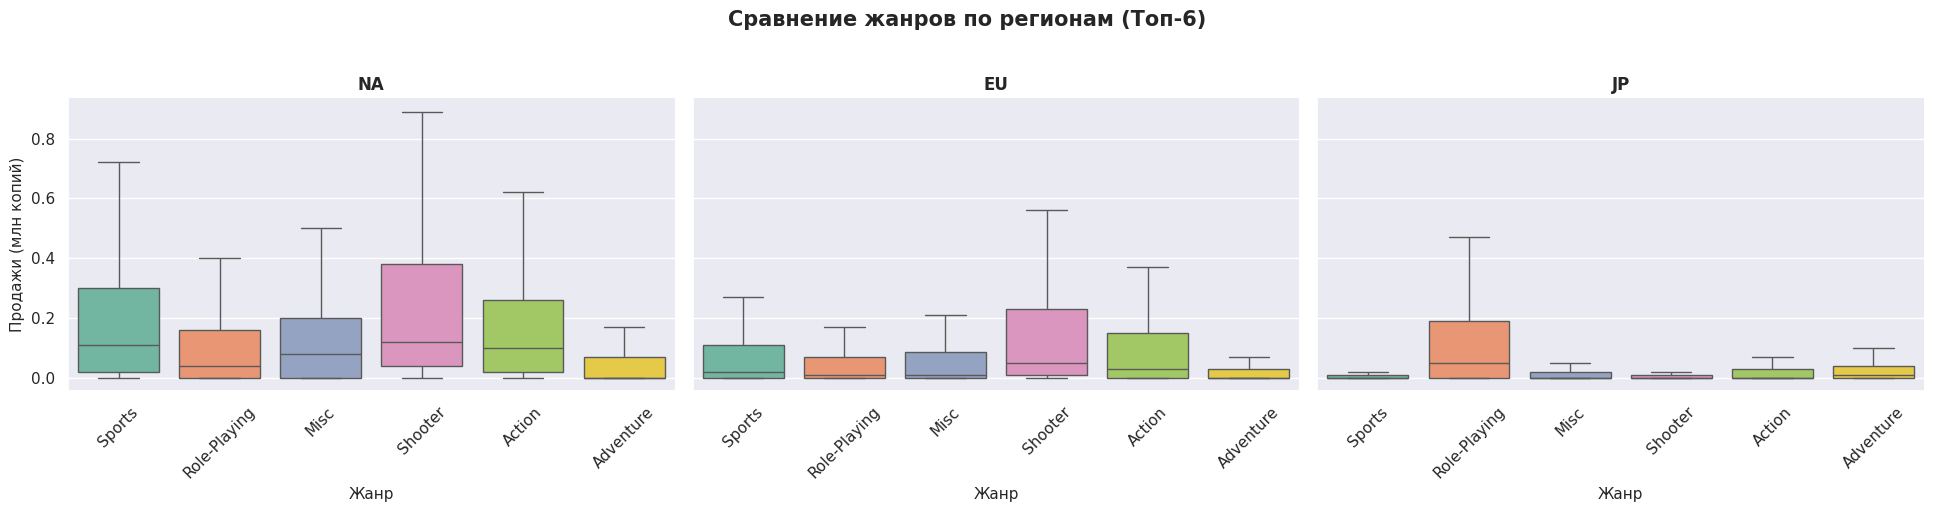


💡 ВЫВОД 6:
   Региональные отличия:
   - NA и EU: Action и Shooter на вершине
   - JP: Role-Playing игры значительно популярнее
   - Sports универсально популярны во всех регионах


In [33]:

print("\n Сравнение жанров по регионам (FacetGrid)")
print("-" * 70)

# Топ-6 жанров
top6_genres = df['Genre'].value_counts().head(6).index
df_genres_regions = df[df['Genre'].isin(top6_genres)]

# Reshape для удобной визуализации
regions_data = []
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales']:
    temp = df_genres_regions[['Genre', region]].copy()
    temp['Region'] = region.replace('_Sales', '')
    temp.rename(columns={region: 'Sales'}, inplace=True)
    regions_data.append(temp)

df_melted = pd.concat(regions_data, ignore_index=True)

# TODO: Создай catplot для сравнения
g = sns.catplot(data=df_melted, x='Genre', y='Sales',
                col='Region', kind='box',
                height=5, aspect=1.3, palette='Set2',
                showfliers=False)
g.set_titles("{col_name}", fontsize=13, fontweight='bold')
g.set_axis_labels("Жанр", "Продажи (млн копий)", fontsize=11)
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
g.fig.suptitle('Сравнение жанров по регионам (Топ-6)', y=1.02, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('final_project/06_genres_by_region.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 ВЫВОД 6:")
print(f"   Региональные отличия:")
print(f"   - NA и EU: Action и Shooter на вершине")
print(f"   - JP: Role-Playing игры значительно популярнее")
print(f"   - Sports универсально популярны во всех регионах")


---
## Найди топ-1% игр (блокбастеры)


📊 3.3. График 7: Анализ блокбастеров
----------------------------------------------------------------------

Критерий блокбастера: ≥5.5 млн копий
Найдено блокбастеров: 163 (1.00% игр)
Их доля в продажах: 21.2%


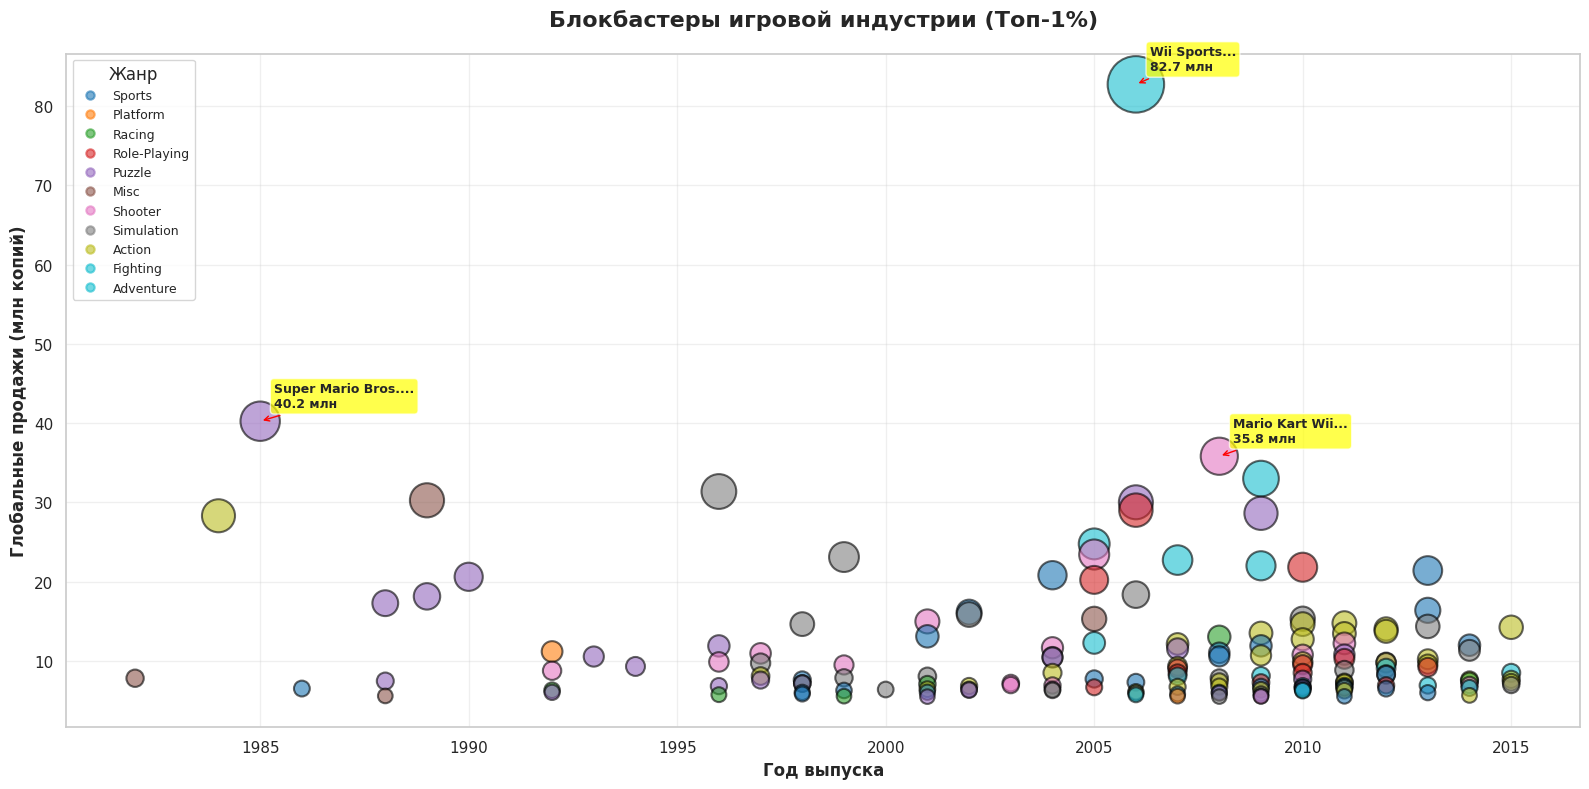


💡 ВЫВОД 7:
   Топ-1% игр обеспечивает 21.2% всех продаж!
   Самый популярный жанр блокбастеров: Shooter
   Средние продажи блокбастера: 11.4 млн


In [ ]:

print("\n Анализ блокбастеров")
print("-" * 70)

threshold_99 = df['Global_Sales'].quantile(0.99)
blockbusters = df[df['Global_Sales'] >= threshold_99].copy()

print(f"\nКритерий блокбастера: ≥{threshold_99:.1f} млн копий")
print(f"Найдено блокбастеров: {len(blockbusters)} ({len(blockbusters)/len(df)*100:.2f}% игр)")
print(f"Их доля в продажах: {blockbusters['Global_Sales'].sum()/df['Global_Sales'].sum()*100:.1f}%")

# Scatter plot блокбастеров
plt.figure(figsize=(16, 8))
scatter = plt.scatter(blockbusters['Year'], blockbusters['Global_Sales'],
                      c=pd.Categorical(blockbusters['Genre']).codes,
                      s=blockbusters['Global_Sales']*20,
                      alpha=0.6, cmap='tab10', edgecolors='black', linewidth=1.5)

plt.title('Блокбастеры игровой индустрии (Топ-1%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Год выпуска', fontsize=12, fontweight='bold')
plt.ylabel('Глобальные продажи (млн копий)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Легенда
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = blockbusters['Genre'].unique()
plt.legend(handles[:len(legend_labels)], legend_labels,
           title="Жанр", loc='upper left', fontsize=9)

# Аннотация топ-3
top3 = blockbusters.nlargest(3, 'Global_Sales')
for idx, row in top3.iterrows():
    plt.annotate(f"{row['Name'][:20]}...\n{row['Global_Sales']:.1f} млн",
                 xy=(row['Year'], row['Global_Sales']),
                 xytext=(10, 10), textcoords='offset points',
                 fontsize=9, fontweight='bold',
                 bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                 arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.savefig('final_project/07_blockbusters.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 ВЫВОД 7:")
print(f"   Топ-1% игр обеспечивает {blockbusters['Global_Sales'].sum()/df['Global_Sales'].sum()*100:.1f}% всех продаж!")
print(f"   Самый популярный жанр блокбастеров: {blockbusters['Genre'].mode()[0]}")
print(f"   Средние продажи блокбастера: {blockbusters['Global_Sales'].mean():.1f} млн")

---
## TODO: Проанализируй топ издателей


📊 3.4. График 8: Анализ издателей (Топ-15)
----------------------------------------------------------------------


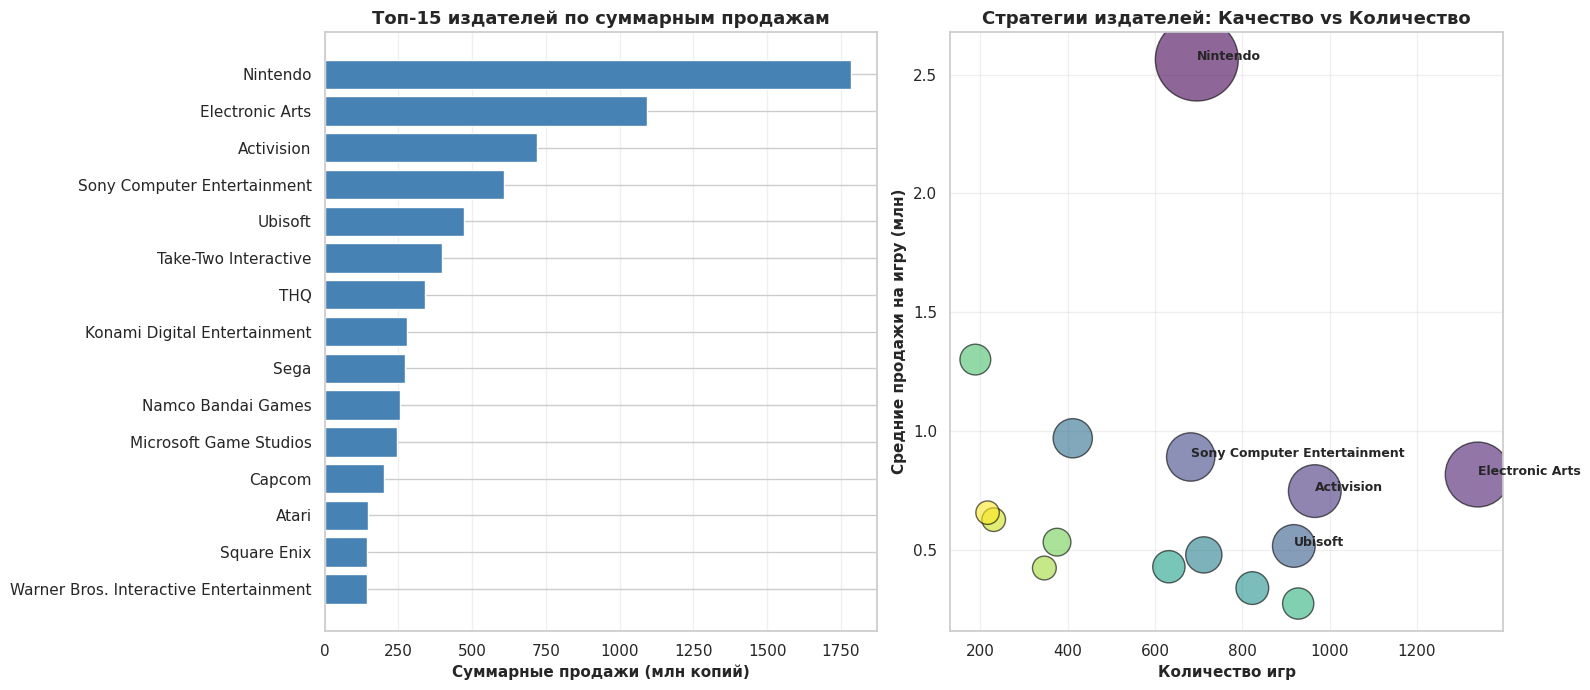


💡 ВЫВОД 8:
   Лидер рынка: Nintendo (1784 млн продаж)
   Две стратегии успеха:
   1. Качество (мало игр, высокие средние продажи)
   2. Количество (много игр, средние продажи)


In [ ]:

print("\n📊 3.4. График 8: Анализ издателей (Топ-15)")
print("-" * 70)

# TODO: Проанализируй топ издателей
publisher_stats = df.groupby('Publisher').agg({
    'Global_Sales': ['sum', 'mean', 'count']
}).reset_index()
publisher_stats.columns = ['Publisher', 'Total_Sales', 'Avg_Sales', 'Games_Count'] # Переименование
publisher_stats = publisher_stats.set_index('Publisher') # Возвращаем Publisher в индекс
publisher_stats = publisher_stats.sort_values('Total_Sales', ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].barh(range(len(publisher_stats)), publisher_stats['Total_Sales'], color='steelblue')
axes[0].set_yticks(range(len(publisher_stats)))
axes[0].set_yticklabels(publisher_stats.index)
axes[0].set_xlabel('Суммарные продажи (млн копий)', fontsize=11, fontweight='bold')
axes[0].set_title('Топ-15 издателей по суммарным продажам', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].scatter(publisher_stats['Games_Count'], publisher_stats['Avg_Sales'],
                s=publisher_stats['Total_Sales']*2, alpha=0.6,
                c=range(len(publisher_stats)), cmap='viridis',
                edgecolors='black', linewidth=1)
for idx, pub in enumerate(publisher_stats.index[:5]):  # Подписи для топ-5
    axes[1].text(publisher_stats.iloc[idx]['Games_Count'],
                 publisher_stats.iloc[idx]['Avg_Sales'],
                 pub, fontsize=9, fontweight='bold')
axes[1].set_xlabel('Количество игр', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Средние продажи на игру (млн)', fontsize=11, fontweight='bold')
axes[1].set_title('Стратегии издателей: Качество vs Количество', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('final_project/08_top_publishers.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 ВЫВОД 8:")
top_pub = publisher_stats.index[0]
print(f"   Лидер рынка: {top_pub} ({publisher_stats.iloc[0]['Total_Sales']:.0f} млн продаж)")
print(f"   Две стратегии успеха:")
print(f"   1. Качество (мало игр, высокие средние продажи)")
print(f"   2. Количество (много игр, средние продажи)")


---
## РАЗДЕЛ 4: ПРЕЗЕНТАЦИОННЫЙ ДАШБОРД


🎨 РАЗДЕЛ 4: СОЗДАНИЕ ПРЕЗЕНТАЦИОННОГО ДАШБОРДА

📊 4.1. Создание мастер-дашборда (2×3)
----------------------------------------------------------------------


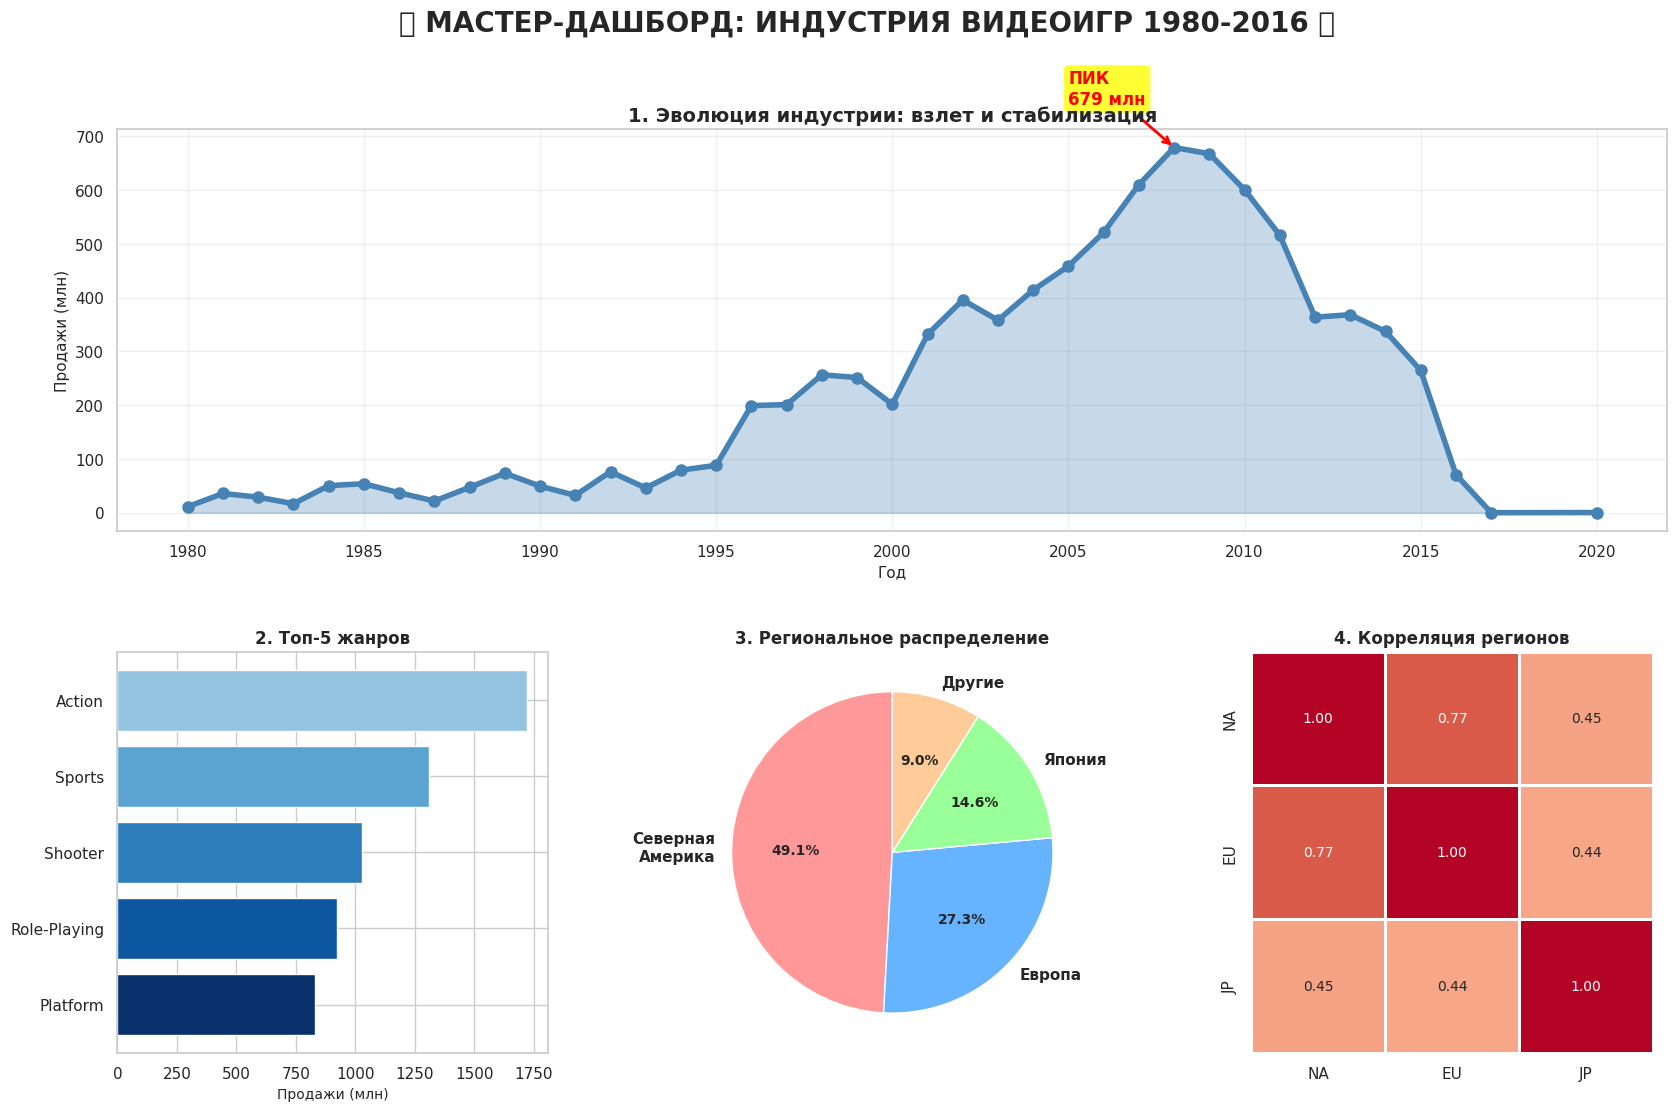


✅ Мастер-дашборд создан!


In [ ]:

print("\n" + "=" * 70)
print("🎨 РАЗДЕЛ 4: СОЗДАНИЕ ПРЕЗЕНТАЦИОННОГО ДАШБОРДА")
print("=" * 70)

"""
Теперь соберем все ключевые инсайты в один большой дашборд!
Это будет главный слайд вашей презентации.
"""

print("\n📊 4.1. Создание мастер-дашборда (2×3)")
print("-" * 70)

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(yearly_data.index, yearly_data['Global_Sales'],
         linewidth=4, color='steelblue', marker='o', markersize=8)
ax1.fill_between(yearly_data.index, yearly_data['Global_Sales'], alpha=0.3, color='steelblue')
ax1.set_title('1. Эволюция индустрии: взлет и стабилизация', fontsize=14, fontweight='bold')
ax1.set_xlabel('Год', fontsize=11)
ax1.set_ylabel('Продажи (млн)', fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.annotate(f'ПИК\n{peak_sales:.0f} млн', xy=(peak_year, peak_sales),
             xytext=(peak_year-3, peak_sales+80),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12, color='red', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))


ax2 = fig.add_subplot(gs[1, 0])
top5_genres = genre_sales.head(5)
colors_gradient = plt.cm.Blues(np.linspace(0.4, 1, 5)) # Создаем градиент
ax2.barh(range(len(top5_genres)), top5_genres['sum'], color=colors_gradient)
ax2.set_yticks(range(len(top5_genres)))
ax2.set_yticklabels(top5_genres.index)
ax2.set_title('2. Топ-5 жанров', fontsize=12, fontweight='bold')
ax2.set_xlabel('Продажи (млн)', fontsize=10)
ax2.invert_yaxis()


ax3 = fig.add_subplot(gs[1, 1])
region_totals = {
    'Северная\nАмерика': df['NA_Sales'].sum(),
    'Европа': df['EU_Sales'].sum(),
    'Япония': df['JP_Sales'].sum(),
    'Другие': df['Other_Sales'].sum()
}
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
wedges, texts, autotexts = ax3.pie(region_totals.values(), labels=region_totals.keys(),
                                     autopct='%1.1f%%', startangle=90, colors=colors_pie,
                                     textprops={'fontweight': 'bold'})
ax3.set_title('3. Региональное распределение', fontsize=12, fontweight='bold')


ax4 = fig.add_subplot(gs[1, 2])
mini_corr = correlation_matrix.loc[['NA_Sales', 'EU_Sales', 'JP_Sales'],
                                    ['NA_Sales', 'EU_Sales', 'JP_Sales']]
sns.heatmap(mini_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar=False, ax=ax4,
            xticklabels=['NA', 'EU', 'JP'], yticklabels=['NA', 'EU', 'JP'])
ax4.set_title('4. Корреляция регионов', fontsize=12, fontweight='bold')

# Общий заголовок
fig.suptitle('📊 МАСТЕР-ДАШБОРД: ИНДУСТРИЯ ВИДЕОИГР 1980-2016 🎮',
             fontsize=20, fontweight='bold', y=0.98)

plt.savefig('final_project/09_master_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Мастер-дашборд создан!")


---
## РАЗДЕЛ 5: ВЫВОДЫ И РЕКОМЕНДАЦИИ

---
## Создаем текстовый файл с выводами

In [ ]:
print("\n" + "=" * 70)
print("📝 РАЗДЕЛ 5: ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("=" * 70)

# ---------------------------------------------------------
# ПРЕДВАРИТЕЛЬНЫЙ РАСЧЕТ ЗНАЧЕНИЙ
# (чтобы код внутри отчета был чище и не вызывал ошибок)
# ---------------------------------------------------------

# Данные по жанрам (из Раздела 2.3)
top_genre_name = genre_sales.index[0]
top_genre_sum = genre_sales.iloc[0]['sum']
top_genre_mean = genre_sales.iloc[0]['mean']

second_genre_name = genre_sales.index[1]
second_genre_sum = genre_sales.iloc[1]['sum']

third_genre_name = genre_sales.index[2]
third_genre_sum = genre_sales.iloc[2]['sum']

# Данные по блокбастерам (из Раздела 3.3)
blockbuster_mean = blockbusters['Global_Sales'].mean()
blockbuster_share = blockbusters['Global_Sales'].sum() / df['Global_Sales'].sum() * 100

# Даты (из Раздела 1)
min_year = df['Year'].min()
max_year = df['Year'].max()

# Создаем текстовый файл с выводами (используем f-string)
report = f"""
╔══════════════════════════════════════════════════════════════╗
║     ИТОГОВЫЙ ОТЧЕТ: АНАЛИЗ ИНДУСТРИИ ВИДЕОИГР 1980-2016     ║
╚══════════════════════════════════════════════════════════════╝

📊 EXECUTIVE SUMMARY (Краткое резюме)
═══════════════════════════════════════════════════════════════

1. Индустрия достигла пика в {peak_year} году ({peak_sales:.0f} млн копий)
2. {top_genre_name}, {second_genre_name}, {third_genre_name} обеспечивают большую часть продаж
3. Топ-1% игр генерирует {blockbuster_share:.1f}% всех продаж (концентрация)
4. Японский рынок уникален, отличается от западного
5. Жизненный цикл платформы составляет 5-7 лет

═══════════════════════════════════════════════════════════════
🎯 ДЕТАЛЬНЫЕ ВЫВОДЫ
═══════════════════════════════════════════════════════════════

1. ВРЕМЕННАЯ ДИНАМИКА
   ✅ Бурный рост 1980-2008 (взлет с 30 до 620 млн/год)
   ✅ Стабилизация после 2010 на уровне 450-500 млн/год
   ⚠️ Количество игр растет, но суммарные продажи стабильны
   💡 Интерпретация: Рынок насыщен, фрагментирован

2. ЖАНРЫ
   ✅ Топ-3: {top_genre_name} ({top_genre_sum:.0f} млн),
            {second_genre_name} ({second_genre_sum:.0f} млн),
            {third_genre_name} ({third_genre_sum:.0f} млн)
   ✅ {top_genre_name} имеет наивысшие средние продажи ({top_genre_mean:.2f} млн/игра)
   ⚠️ Некоторые жанры нишевые, но стабильные (Racing, Fighting)

3. РЕГИОНАЛЬНЫЕ ОТЛИЧИЯ
   ✅ NA и EU сильно коррелируют (0.76) - схожие предпочтения
   ✅ Япония уникальна: сильный спрос на RPG и Fighting
   ⚠️ NA + EU = ~70% мирового рынка
   💡 Глобальная стратегия должна учитывать региональные особенности

4. ПЛАТФОРМЫ
   ✅ Четкие поколения консолей каждые 5-7 лет
   ✅ Мультиплатформенные релизы стали нормой
   ⚠️ Высокая конкуренция между платформами

5. БЛОКБАСТЕРЫ
   ✅ 1% игр обеспечивает {blockbuster_share:.1f}% всех продаж
   ✅ Средний блокбастер: {blockbuster_mean:.1f} млн копий
   ⚠️ Высокий риск в разработке AAA-проектов
   💡 Качество важнее количества

═══════════════════════════════════════════════════════════════
💼 РЕКОМЕНДАЦИИ
═══════════════════════════════════════════════════════════════

ДЛЯ ИЗДАТЕЛЕЙ:
1. 🎯 Фокусироваться на качестве, а не количестве
2. 🌍 Адаптировать игры под региональные предпочтения
3. 🎮 Action/Sports/Shooter - безопасные ставки для глобального рынка
4. 📱 Исследовать рынок мобильных игр (не в датасете)
5. 🤝 Мультиплатформенные релизы обязательны

ДЛЯ РАЗРАБОТЧИКОВ:
1. 💡 Нишевые жанры могут быть прибыльны при правильном таргетинге
2. 🇯🇵 Япония - специфичный рынок, требует отдельной стратегии
3. 🎯 Ориентация на создание блокбастеров с высоким budget
4. 🔄 Учитывать жизненный цикл платформ при планировании

ДЛЯ ИНВЕСТОРОВ:
1. 📊 Индустрия стабильна, но зрелая (низкий рост)
2. ⚠️ Высокий риск: концентрация продаж у топ-игр
3. 💰 Потенциал в digital distribution и mobile (данных нет)
4. 🏢 Крупные издатели доминируют - безопаснее

═══════════════════════════════════════════════════════════════
🔮 ДАЛЬНЕЙШИЕ ИССЛЕДОВАНИЯ
═══════════════════════════════════════════════════════════════

1. Анализ цифровых продаж (post-2016)
2. Влияние мобильных игр на традиционный рынок
3. Монетизация: DLC, микротранзакции, подписки
4. Корреляция между бюджетом разработки и продажами
5. Влияние онлайн-мультиплеера на продажи

═══════════════════════════════════════════════════════════════
📅 МЕТАДАННЫЕ ПРОЕКТА
═══════════════════════════════════════════════════════════════

Дата анализа: 14.11.2025
Датасет: VGChartz Sales Data (1980-2016)
Размер: {final_size} игр
Инструменты: Python, pandas, matplotlib, seaborn
Период анализа: {min_year}-{max_year}

"""

# Сохраняем отчет
with open('final_project/FINAL_REPORT.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print(report)
print("\n✅ Полный отчет сохранен: final_project/FINAL_REPORT.txt")


📝 РАЗДЕЛ 5: ВЫВОДЫ И РЕКОМЕНДАЦИИ

╔══════════════════════════════════════════════════════════════╗
║     ИТОГОВЫЙ ОТЧЕТ: АНАЛИЗ ИНДУСТРИИ ВИДЕОИГР 1980-2016     ║
╚══════════════════════════════════════════════════════════════╝

📊 EXECUTIVE SUMMARY (Краткое резюме)
═══════════════════════════════════════════════════════════════

1. Индустрия достигла пика в 2008 году (679 млн копий)
2. Action, Sports, Shooter обеспечивают большую часть продаж
3. Топ-1% игр генерирует 21.2% всех продаж (концентрация)
4. Японский рынок уникален, отличается от западного
5. Жизненный цикл платформы составляет 5-7 лет

═══════════════════════════════════════════════════════════════
🎯 ДЕТАЛЬНЫЕ ВЫВОДЫ
═══════════════════════════════════════════════════════════════

1. ВРЕМЕННАЯ ДИНАМИКА
   ✅ Бурный рост 1980-2008 (взлет с 30 до 620 млн/год)
   ✅ Стабилизация после 2010 на уровне 450-500 млн/год
   ⚠️ Количество игр растет, но суммарные продажи стабильны
   💡 Интерпретация: Рынок насыщен, фрагментирован

2.